# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [18]:
# Derivadas parciales para regresión lineall
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [6]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]

In [7]:
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

## Conjunto de datos 1

In [20]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

# CONJUNTO DE DATOS 1

In [13]:
import numpy as np  

xs = np.array([-5.0000, -3.8889, -2.7778, -1.6667, -0.5556, 0.5556, 1.6667, 2.7778, 3.8889, 5.0000])  
ys = np.array([-12.7292, -7.5775, -7.7390, -4.1646, -4.5382, 2.2048, 4.3369, 2.2227, 9.0625, 7.1860])  

# Construir la matriz A y el vector b para el sistema de ecuaciones normales  
A = np.vstack([xs**2, xs, np.ones(len(xs))]).T  
b = ys  

# Resolver el sistema de ecuaciones usando la pseudoinversa  
coeffs = np.linalg.lstsq(A, b, rcond=None)[0]  

# Coeficientes de la función cuadrática  
a2, a1, a0 = coeffs  

print(f"a2: {a2:.4f}")  
print(f"a1: {a1:.4f}")  
print(f"a0: {a0:.4f}")  

#Calcular y(2.25) y y(-2.25)  
y_2_25 = a2*(2.25)**2 + a1*(2.25) + a0  
y_neg_2_25 = a2*(-2.25)**2 + a1*(-2.25) + a0  

print(f"y(2.25): {y_2_25:.4f}")  
print(f"y(-2.25): {y_neg_2_25:.4f}")

a2: -0.0490
a1: 2.0606
a0: -0.6749
y(2.25): 3.7135
y(-2.25): -5.5591


# CONJUNTO DE DATOS 2

[01-11 14:28:30][INFO] generated new fontManager
a: 0.5002
b: 1.5044


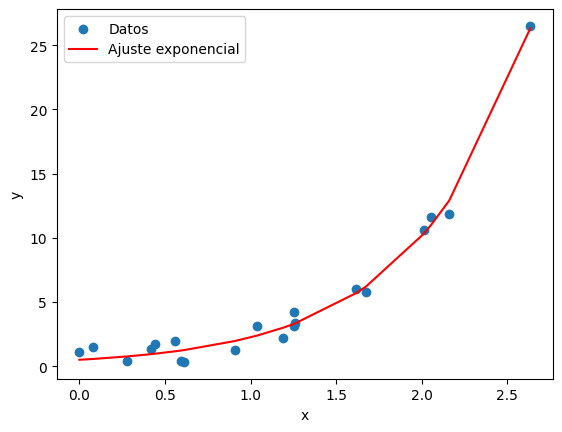

In [17]:
import numpy as np  
from scipy.optimize import curve_fit  
import matplotlib.pyplot as plt #Para visualizar el resultado  

xs2 = np.array([0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070, 1.0367, 1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 2.1610, 2.6344])  
ys2 = np.array([1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887, 3.1239, 2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 11.8221, 26.5077])  


def exponential_func(x, a, b):  
  return a * np.exp(b * x)  

# Ajustar la curva  
params, covariance = curve_fit(exponential_func, xs2, ys2, p0=[1,1]) # p0 son valores iniciales para a y b  

# Parámetros ajustados  
a, b = params  

print(f"a: {a:.4f}")  
print(f"b: {b:.4f}")  

# Calcular valores ajustados  
ys_fit = exponential_func(xs2, a, b)  


# Visualizacion (opcional):  
plt.scatter(xs2,ys2, label = 'Datos')  
plt.plot(xs2,ys_fit, label='Ajuste exponencial', color='red')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()